# 1.1 Tabular Q-learning

##  Discrete state, discrete action problem

Simple dicrete gridworld environment that can be solved with a tabular Reinforcement Learning (RL)

In [1]:
# import env and modules
import gym
import numpy as np
import myenv
import inspect
import service_functions as sf

In [2]:
# create an instance of the environment
env = myenv.SimpleGridWorldEnv()
env.render()
print('Env step return (state,reward,done):',env.step(env.action_space.sample()))

The environment is initialized
This is a simple grid-world env 5x5 with 1x25 state.
You can render it with .render()
[[0. 1. 0. 3. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 4. 0.]
 [8. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]]
Env step return (state,reward,done): (10, 0, False, {})


### Value-based algorithms in Reinforcement Learning (RL)
Q-Learning and SARSA are classic methods of Value-based RL.

The policy model (or behavior model) stores state-action-value information (in this example, it is a table of values).
For each given state it can say how valuable is to take any action in any given state.

### SARSA algorithm (on-policy learning)

In [3]:
#SARSA algorithm
def SARSA(q_table, exploration_policy):
    
    Q = np.copy(q_table)
    stats = []
    
    for i_episode in range(n_episodes):
        r_total = 0
        s = env.reset()
        a = exploration_policy(Q[s], eps)
            
        for t in range(episode_lenght):
        
            s_prime, r, d, _ = env.step(a)
            a_prime = exploration_policy(Q[s_prime], eps)
        
            # Q Update
            q_target = r + gamma * Q[s_prime][a_prime]
            q_delta = q_target - Q[s][a]
            Q[s][a] = Q[s][a] + alpha * q_delta
    
            if d:
                break
                
            a = a_prime
            s = s_prime
            r_total += r
        
        # Update statistics
        r_total /= t
        stats.append([i_episode,r_total])
        sf.print_progress(i_episode,n_episodes-1, r_total)
    return Q, stats

### Q-learning algorithm (off-policy)

In [4]:
def Q_Learn(q_table, exploration_policy):
    
    Q = np.copy(q_table)
    stats = []

    for i_episode in range(n_episodes):

        r_total = 0
        s = env.reset()
        a = exploration_policy(Q[s], eps)
    
        for t in range(episode_lenght):
        
            a = exploration_policy(Q[s], eps)
            s_prime, r, d, _ = env.step(a)
            
            # Q Update
            q_target = r + gamma * max(Q[s_prime])
            q_delta = q_target - Q[s][a]
            Q[s][a] = Q[s][a] + alpha * q_delta
    
            if d:
                break
                
            s = s_prime
            r_total += r
                
        # Update statistics
        r_total /= t
        stats.append([i_episode,r_total])
        sf.print_progress(i_episode,n_episodes-1, r_total)
    return Q, stats

In [5]:
# use epsilon greedy exploration policy
print(inspect.getsource(sf.epsilon_greedy_policy))

def epsilon_greedy_policy(q_val, epsilon):
    """ epsilon greedy policy (explores in epsilon times)"""
    if np.random.uniform() < epsilon:
        #explore
        action = np.random.randint(len(q_val))
    else:
        #be greedy
        action = np.argmax(q_val)
    return action



## Testing the algorithms

In [6]:
# initialize hyperparams
n_episodes = 1000
episode_lenght = 100
gamma = 0.95 # discount
alpha = 0.05 # learning rate
eps = 0.01 # exploration rate

In [7]:
# SARSA vs QLearn in stoch env
env.stochastic_transitions = True

Q_sarsa, stats_sarsa = SARSA(np.zeros((5*5,4)), sf.epsilon_greedy_policy)
Q_ql, stats_ql = Q_Learn(np.zeros((5*5,4)), sf.epsilon_greedy_policy)

env.stochastic_transitions = False

_, stats_sarsa_det = SARSA(np.zeros((env.observation_space.n, env.action_space.n)), sf.epsilon_greedy_policy)
_, stats_ql_det = Q_Learn(np.zeros((env.observation_space.n, env.action_space.n)), sf.epsilon_greedy_policy)

 |██████████████████████████████████████████████████| Progress:100.0% Val:1.7575757575757576 
 |██████████████████████████████████████████████████| Progress:100.0% Val:1.4646464646464648 
 |██████████████████████████████████████████████████| Progress:100.0% Val:2.0202020202020203  
 |██████████████████████████████████████████████████| Progress:100.0% Val:1.6161616161616161  


In [8]:
# Print the final policies
print('Sarsa policy:')
sf.print_policy(Q_sarsa)
print('QLearn policy:')
sf.print_policy(Q_ql)

Sarsa policy:
⇩⇧⇩⇧⇦
⇩⇧⇦⇧⇧
⇩⇧⇧⇧⇧
⇩⇧⇧⇧⇧
⇨⇧⇧⇧⇧

QLearn policy:
⇩⇧⇩⇧⇦
⇨⇧⇨⇧⇧
⇨⇧⇧⇧⇧
⇨⇧⇧⇧⇧
⇨⇧⇧⇧⇧



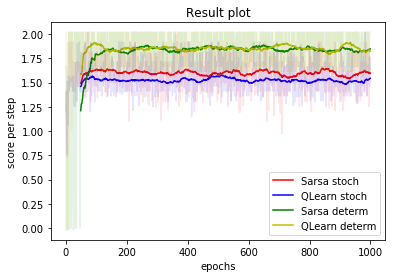

In [10]:
# Plot the training convergence
sf.plot_results([stats_sarsa,stats_ql,stats_sarsa_det,stats_ql_det],['Sarsa stoch','QLearn stoch','Sarsa determ','QLearn determ'], average_over=50)